# Further Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('darkgrid')
sns.set_context('poster')
pd.options.display.max_columns = 30

In [2]:
yearly = pd.read_csv('../data/yearly-team-data.csv')

In [3]:
yearly.shape

(788, 17)

In [4]:
yearly.head()

,team,year,stadium,capacity,team_name,division,G,win_pct,gb,playoffs,attendance,bat_age,pitch_age,top_player,WAR,num_home_games,avg_att_pg
0,ANA,1997,Angel Stadium,33851,Anaheim Angels,AL West,162,0.519,6.0,0,1767330,29.7,28.3,T.Salmon,4.9,81.0,21818.888889
1,ANA,1998,Angel Stadium,45050,Anaheim Angels,AL West,162,0.525,3.0,0,2519280,28.7,29.8,C.Finley,7.2,81.0,31102.222222
2,ANA,1999,Angel Stadium,45050,Anaheim Angels,AL West,162,0.432,25.0,0,2253123,28.8,31.5,R.Velarde,4.2,81.0,27816.333333
3,ANA,2000,Angel Stadium,45050,Anaheim Angels,AL West,162,0.506,9.5,0,2066982,27.7,28.9,D.Erstad,8.3,81.0,25518.296296
4,ANA,2001,Angel Stadium,45050,Anaheim Angels,AL West,162,0.463,41.0,0,2000919,28.0,28.9,T.Glaus,5.2,81.0,24702.703704


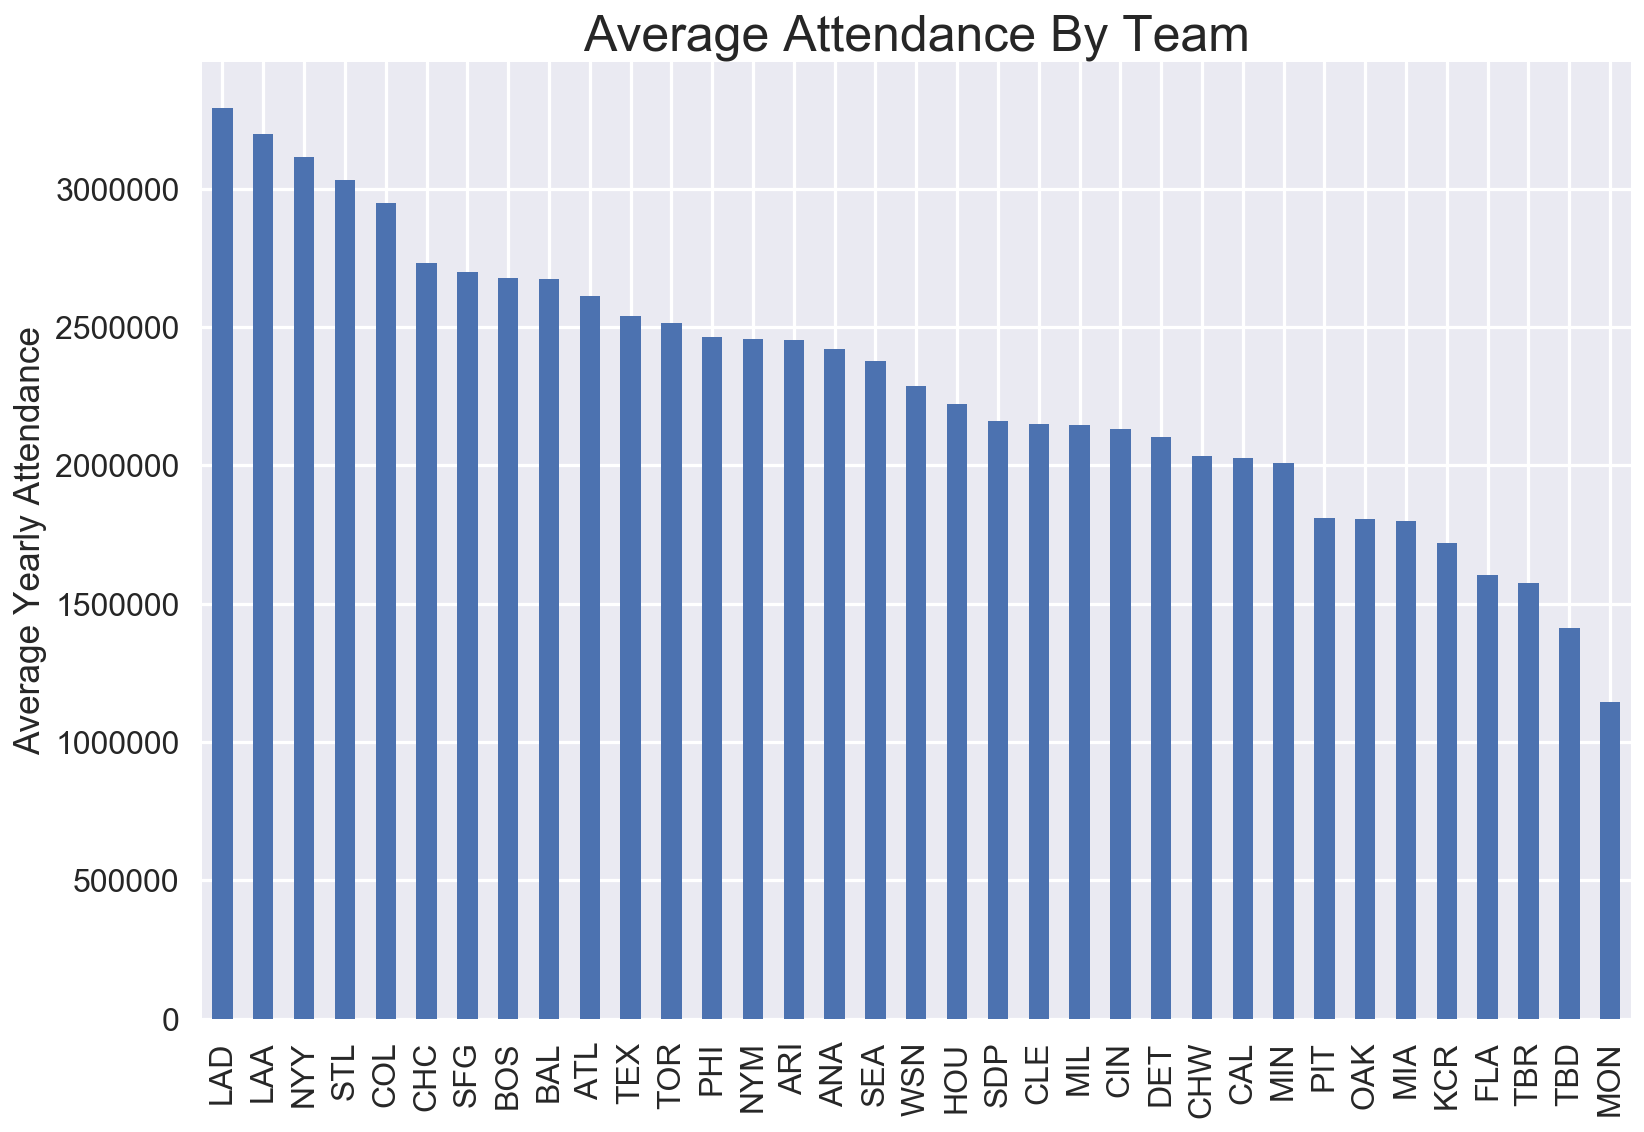

In [6]:
yearly.groupby('team').attendance.mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Attendance By Team', fontsize=25)
plt.xlabel('')
plt.ylabel('Average Yearly Attendance')
plt.savefig('../images/avg-attendance.png')

In [7]:
yearly['att_over_cap'] = (yearly.avg_att_pg / yearly.capacity)

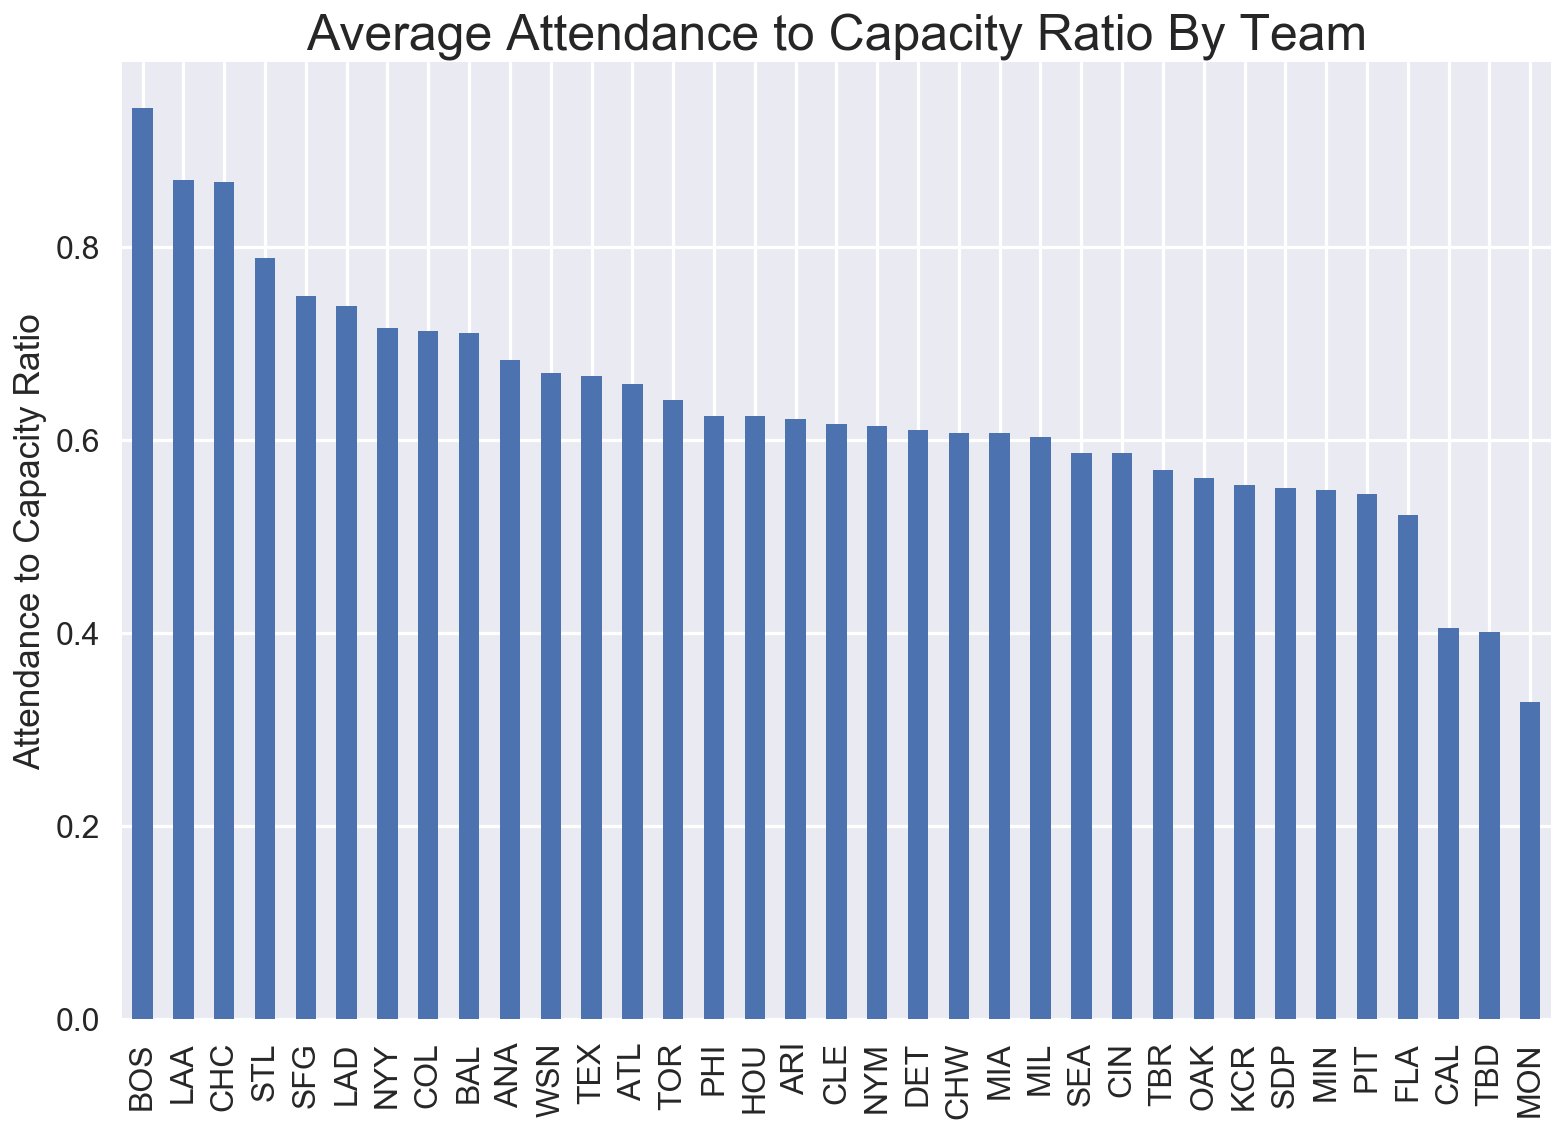

In [8]:
yearly.groupby('team').att_over_cap.mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Attendance to Capacity Ratio By Team', fontsize=25)
plt.xlabel('')
plt.ylabel('Attendance to Capacity Ratio')
plt.savefig('../images/avg-att-cap-ratio.png')

---

### Best Win Pct vs Attendance

In [9]:
df = yearly.sort_values('win_pct', ascending=False).reset_index(drop=True)[0:25]

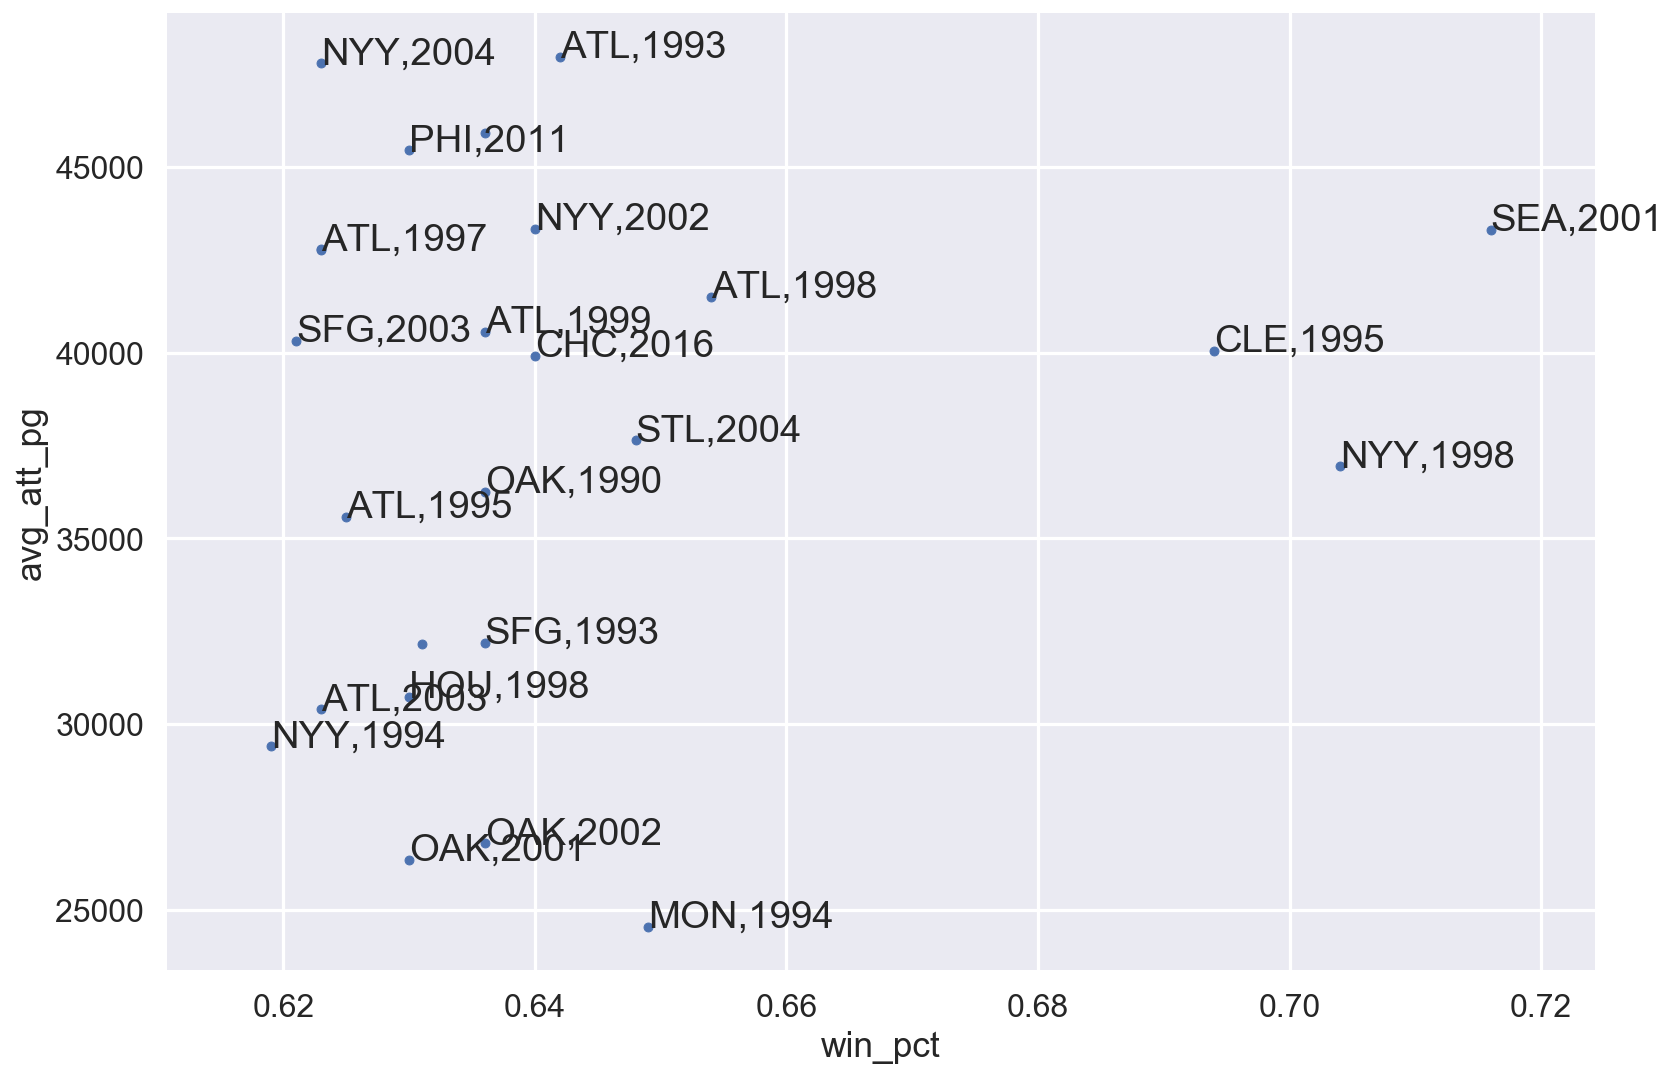

In [10]:
df.plot(x='win_pct', y='avg_att_pg', kind='scatter')

for i in [0,1,2,3,4,5,6,7,8,9,11,12,13,15,16,17,18,20,21,22,23,24]:
    plt.annotate(
        s=(df.loc[i, 'team'] + ',' + str(df.loc[i, 'year'])),
        xy=(df.loc[i, 'win_pct'], df.loc[i, 'avg_att_pg'])
    )

### Best win pct vs attendance to capacity ratio

In [11]:
df = yearly.sort_values('att_over_cap', ascending=False).reset_index(drop=True)[0:50]

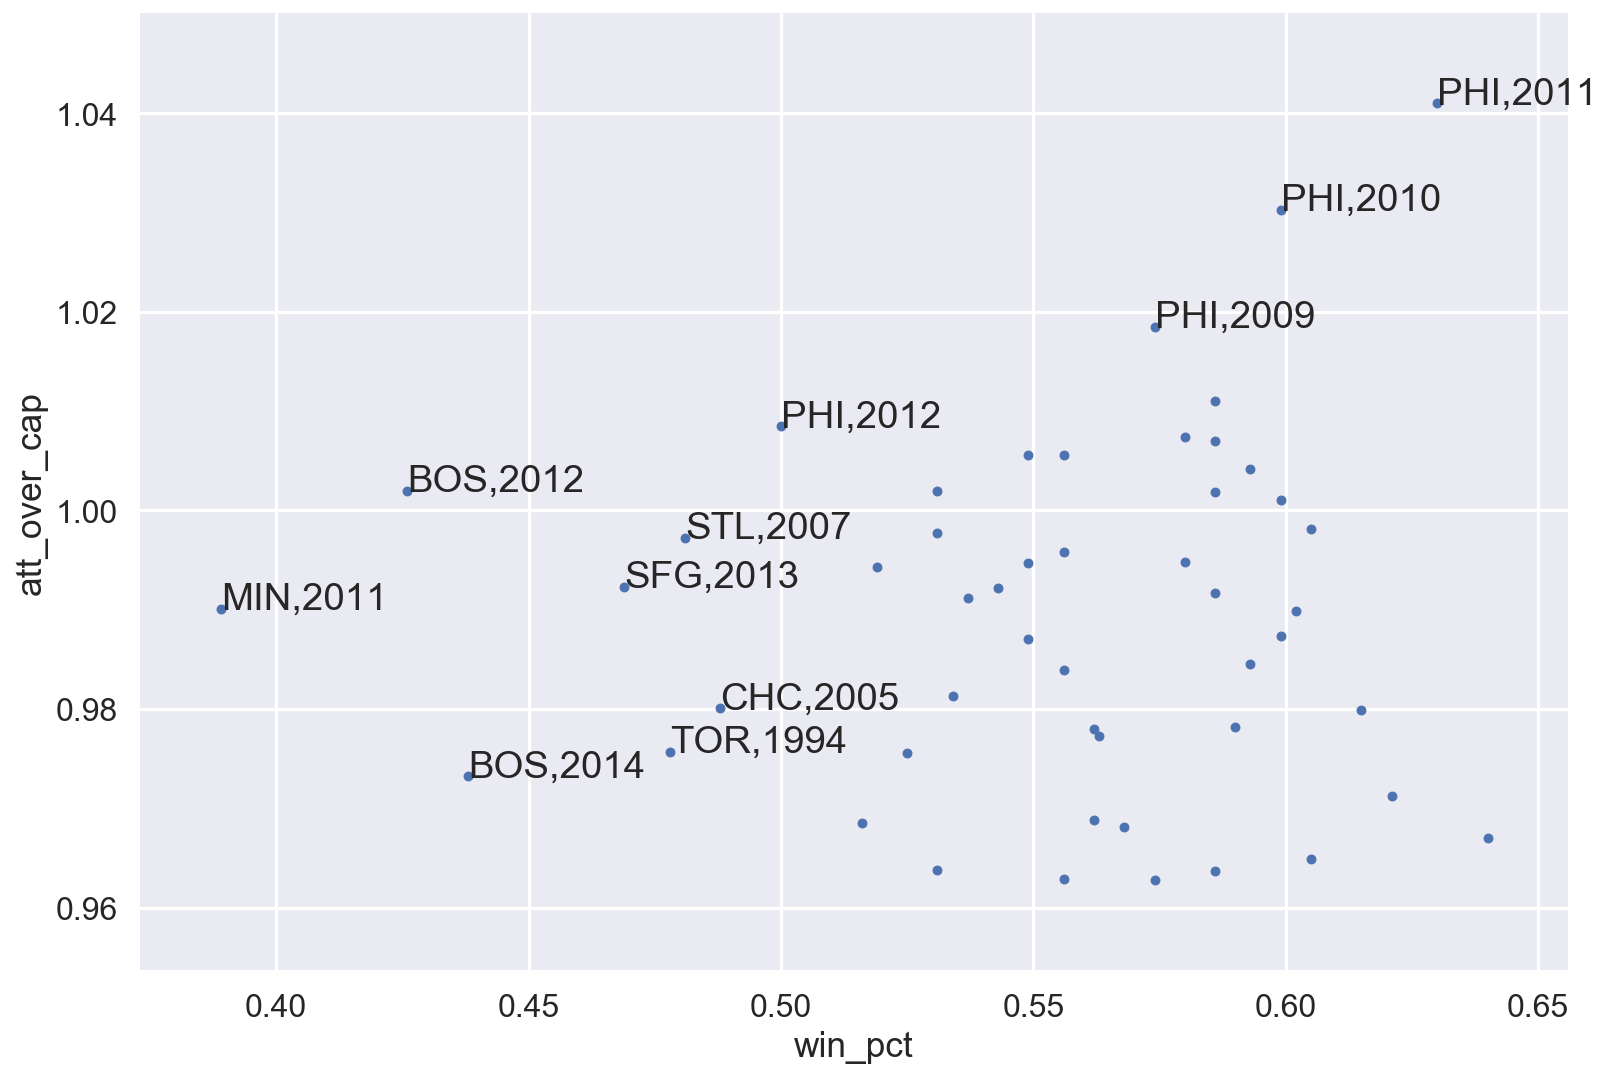

In [12]:
df.plot(x='win_pct', y='att_over_cap', kind='scatter')

for i in [0,1,2,4,11,16,21,25,32,37,39]:
    plt.annotate(
        s=(df.loc[i, 'team'] + ',' + str(df.loc[i, 'year'])),
        xy=(df.loc[i, 'win_pct'], df.loc[i, 'att_over_cap'])
    )

### Worst attendance to capactiy ratios for teams above .500

In [13]:
df = yearly[yearly.win_pct > 0.5].sort_values('att_over_cap').reset_index(drop=True)[0:25]

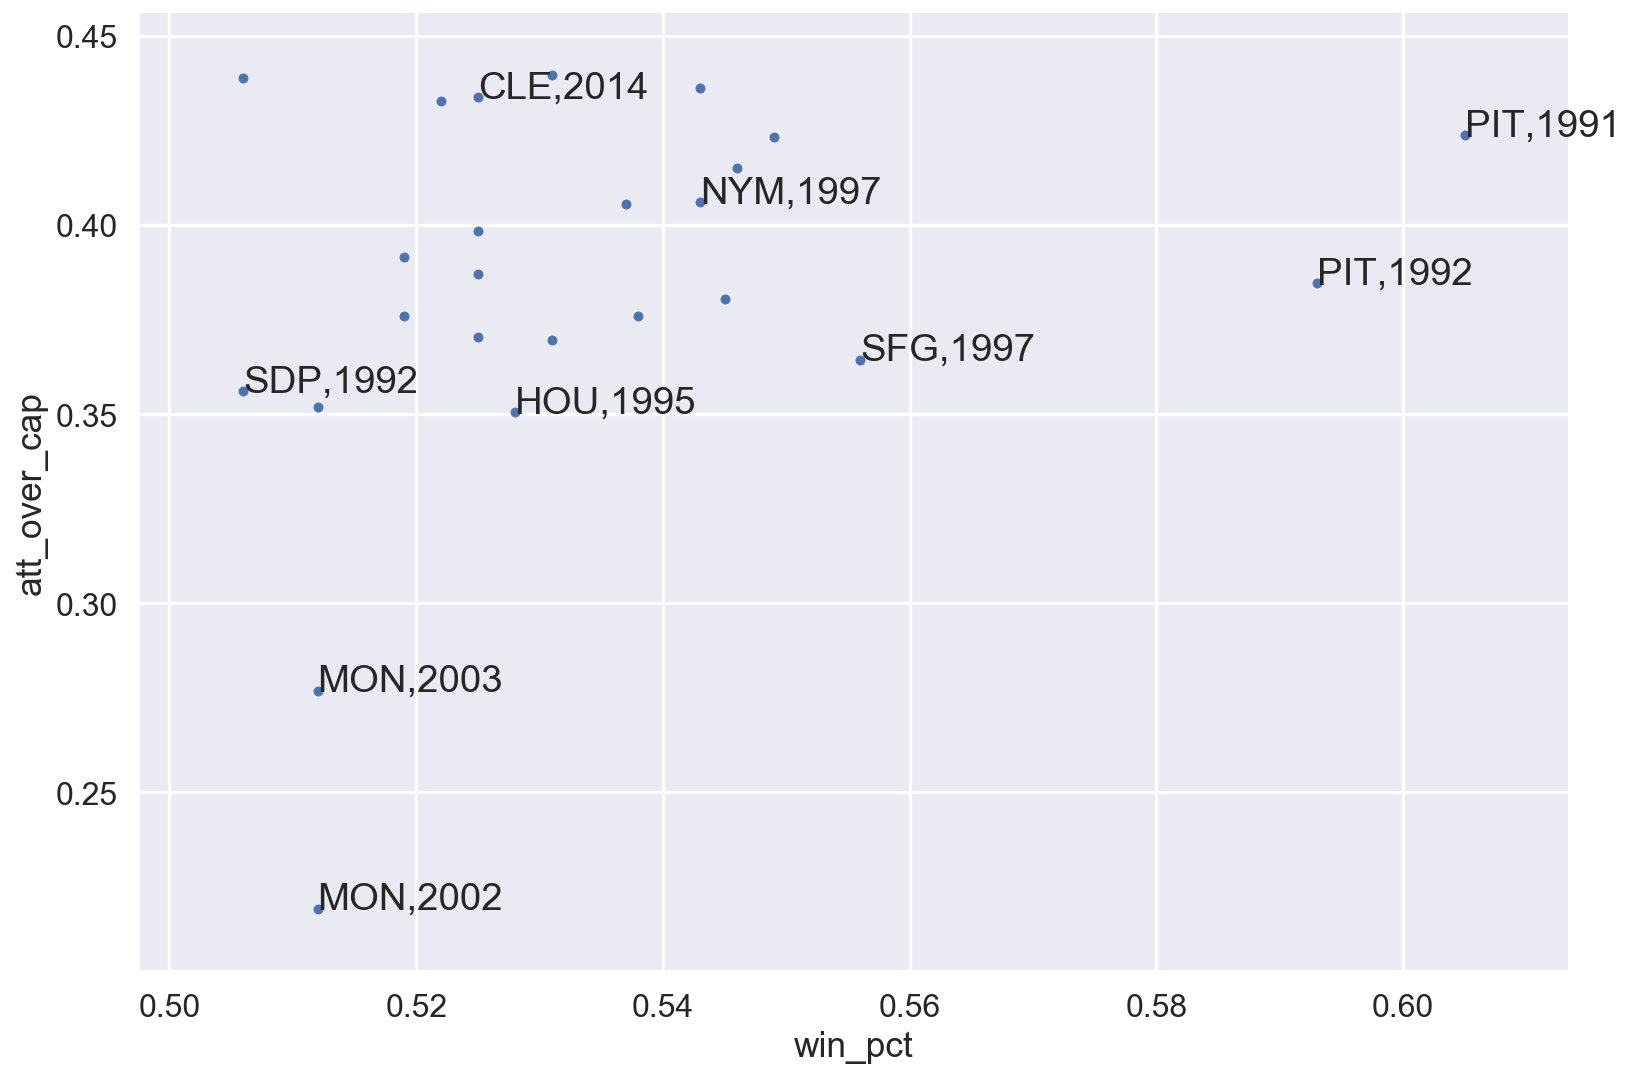

In [14]:
df.plot(x='win_pct', y='att_over_cap', kind='scatter')

for i in [0,1,2,4,5,11,16,19,21]:
    plt.annotate(
        s=(df.loc[i, 'team'] + ',' + str(df.loc[i, 'year'])),
        xy=(df.loc[i, 'win_pct'], df.loc[i, 'att_over_cap'])
    )

---

### Average Attendance and Capacity By Year

In [15]:
yearly_summary = pd.DataFrame(columns=['year', 'avg_att_pg', 'avg_capacity'])
for i in yearly.year.unique():
    yearly_summary.loc[len(yearly_summary)] = [
        i,
        round(np.mean(yearly[yearly.year == i].avg_att_pg),0),
        round(np.mean(yearly[yearly.year == i].capacity),0)
    ]

yearly_summary = yearly_summary.sort_values('year').reset_index(drop=True)

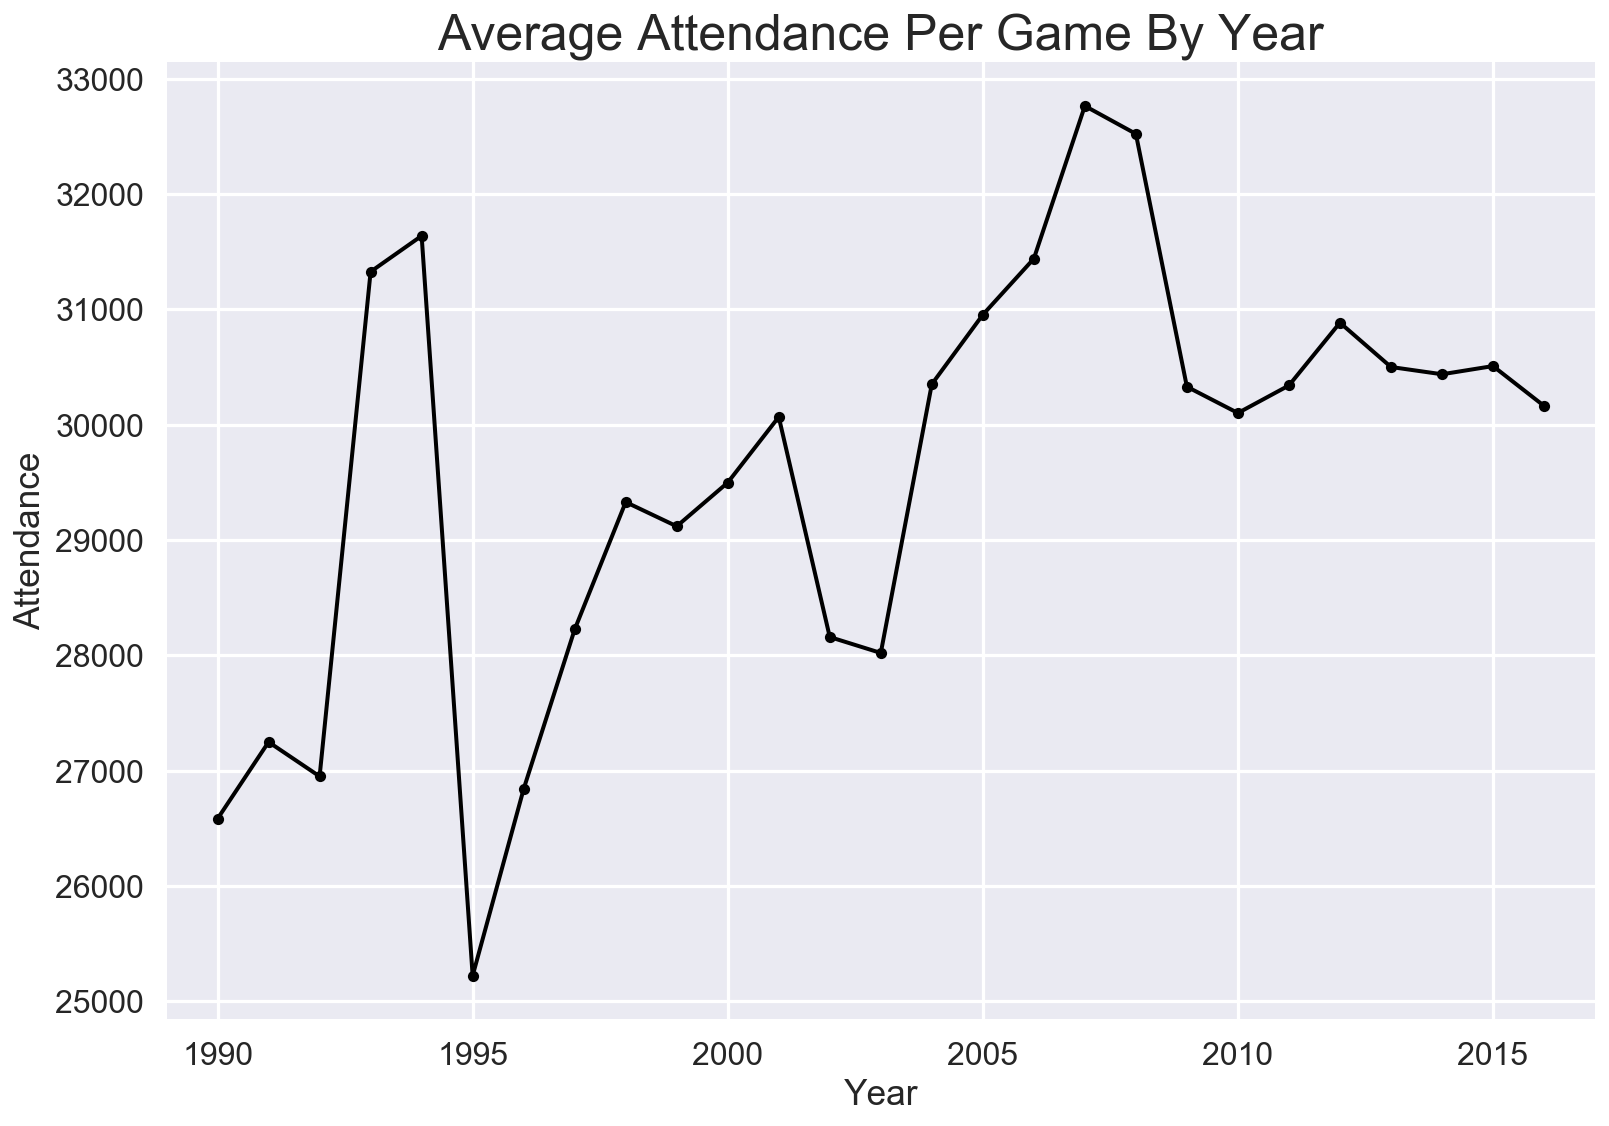

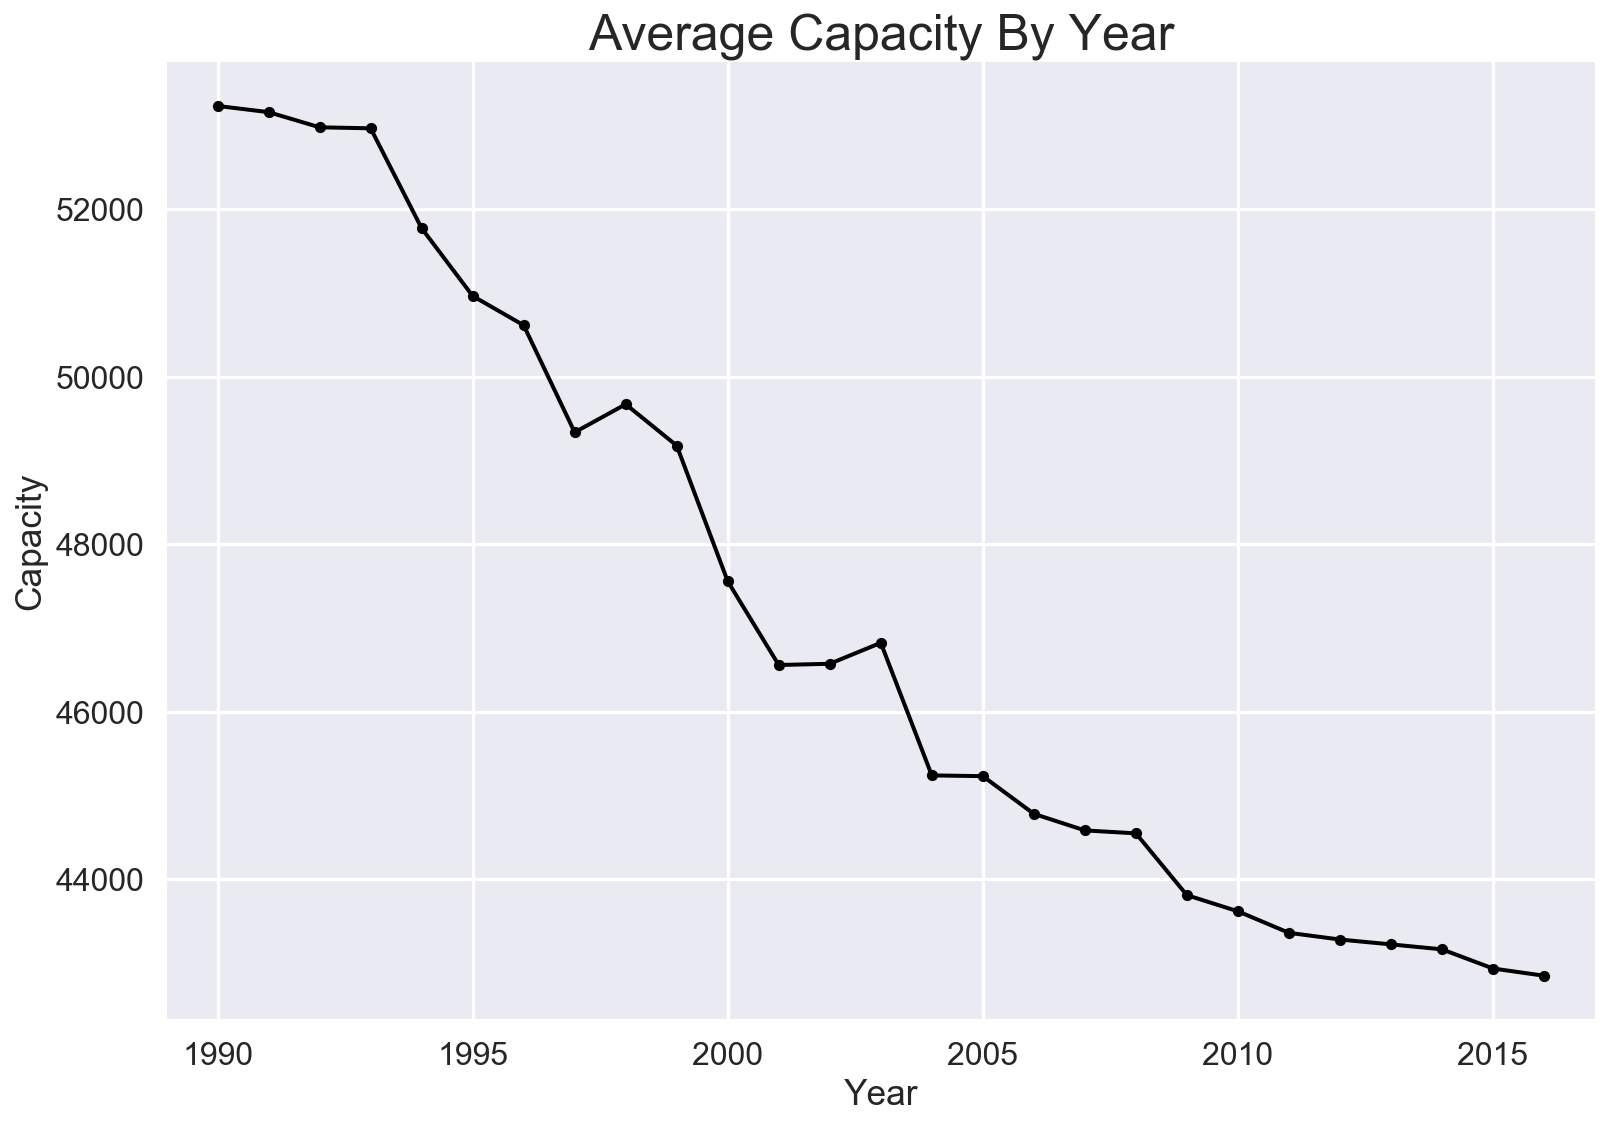

In [16]:
yearly_summary.plot(x='year', y='avg_att_pg', marker='.', c='k', linewidth=2)
plt.xlim(1989,2017)
plt.title('Average Attendance Per Game By Year', fontsize=25)
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.legend().set_visible(False)
plt.savefig('../images/attendance-by-year.png')

yearly_summary.plot(x='year', y='avg_capacity', marker='.', c='k', linewidth=2)
plt.xlim(1989,2017)
plt.title('Average Capacity By Year', fontsize=25)
plt.xlabel('Year')
plt.ylabel('Capacity')
plt.legend().set_visible(False)
plt.savefig('../images/capacity-by-year.png')

### Smallest and Largest Ball Parks

In [17]:
yearly[yearly.capacity == max(yearly.capacity)]

,team,year,stadium,capacity,team_name,division,G,win_pct,gb,playoffs,attendance,bat_age,pitch_age,top_player,WAR,num_home_games,avg_att_pg,att_over_cap
223,COL,1993,Mile High Stadium,76273,Colorado Rockies,NL West,162,0.414,37.0,0,4483350,27.7,27.1,A.Galarraga,3.5,79.0,56751.265823,0.744054
224,COL,1994,Mile High Stadium,76273,Colorado Rockies,NL West,117,0.453,6.5,0,3281511,29.7,28.0,M.Freeman,4.6,56.0,58598.410714,0.768272


In [18]:
yearly[yearly.capacity == min(yearly.capacity)]

,team,year,stadium,capacity,team_name,division,G,win_pct,gb,playoffs,attendance,bat_age,pitch_age,top_player,WAR,num_home_games,avg_att_pg,att_over_cap
719,TBR,2014,Tropicana,31042,Tampa Bay Rays,AL East,162,0.475,19.0,0,1446464,29.3,28.4,B.Zobrist,5.1,81.0,17857.580247,0.575272
720,TBR,2015,Tropicana,31042,Tampa Bay Rays,AL East,162,0.494,13.0,0,1287054,28.4,26.7,K.Kiermaier,7.4,84.0,15322.071429,0.493592
721,TBR,2016,Tropicana,31042,Tampa Bay Rays,AL East,162,0.420,25.0,0,1286163,27.7,26.9,K.Kiermaier,5.5,81.0,15878.555556,0.511518


### Most and least attendance

In [19]:
yearly[yearly.attendance == min(yearly.attendance)]

,team,year,stadium,capacity,team_name,division,G,win_pct,gb,playoffs,attendance,bat_age,pitch_age,top_player,WAR,num_home_games,avg_att_pg,att_over_cap
456,MON,2001,Olympic Stadium,45757,Montreal Expos,NL East,162,0.42,20.0,0,642745,27.6,27.4,J.Vazquez,6.3,81.0,7935.123457,0.173419


In [20]:
yearly[yearly.attendance == max(yearly.attendance)]

,team,year,stadium,capacity,team_name,division,G,win_pct,gb,playoffs,attendance,bat_age,pitch_age,top_player,WAR,num_home_games,avg_att_pg,att_over_cap
223,COL,1993,Mile High Stadium,76273,Colorado Rockies,NL West,162,0.414,37.0,0,4483350,27.7,27.1,A.Galarraga,3.5,79.0,56751.265823,0.744054


---

### Team Summary

In [21]:
team_summary = pd.DataFrame(columns=['team', 'avg_win_pct', 'avg_capacity',
                                     'std_capacity', 'avg_attendance', 'std_attendance'])
for i in yearly.team.unique():    
    avg_win_pct = round(np.mean(yearly[yearly.team == i].win_pct), 3)
    avg_cap = round(np.mean(yearly[yearly.team == i].capacity),0)
    std_cap = np.std(yearly[yearly.team == i].capacity)
    avg_att = round(np.mean(yearly[yearly.team == i].attendance),0) / 1000000
    std_att = np.std(yearly[yearly.team == i].attendance) / 1000000
    
    team_summary.loc[len(team_summary)] = [i, avg_win_pct, avg_cap, std_cap, avg_att, std_att]

In [22]:
team_summary.sort_values('avg_capacity')

,team,avg_win_pct,avg_capacity,std_capacity,avg_attendance,std_attendance
31,TBR,0.531,33928.0,2311.635726,1.574533,0.215926
4,BOS,0.538,35460.0,1600.956431,2.676934,0.326426
17,MIA,0.443,36742.0,0.000000,1.800540,0.217315
12,FLA,0.476,39182.0,3623.924806,1.603401,0.477683
6,CHC,0.486,39816.0,1098.275818,2.729558,0.414903
14,KCR,0.456,39818.0,1242.928512,1.720504,0.351912
23,OAK,0.518,40656.0,5170.525357,1.804549,0.462271
34,WSN,0.489,42559.0,1761.397874,2.286618,0.324174
7,CHW,0.515,42847.0,2323.048078,2.032974,0.437261
25,PIT,0.469,43435.0,6901.727027,1.808695,0.368875


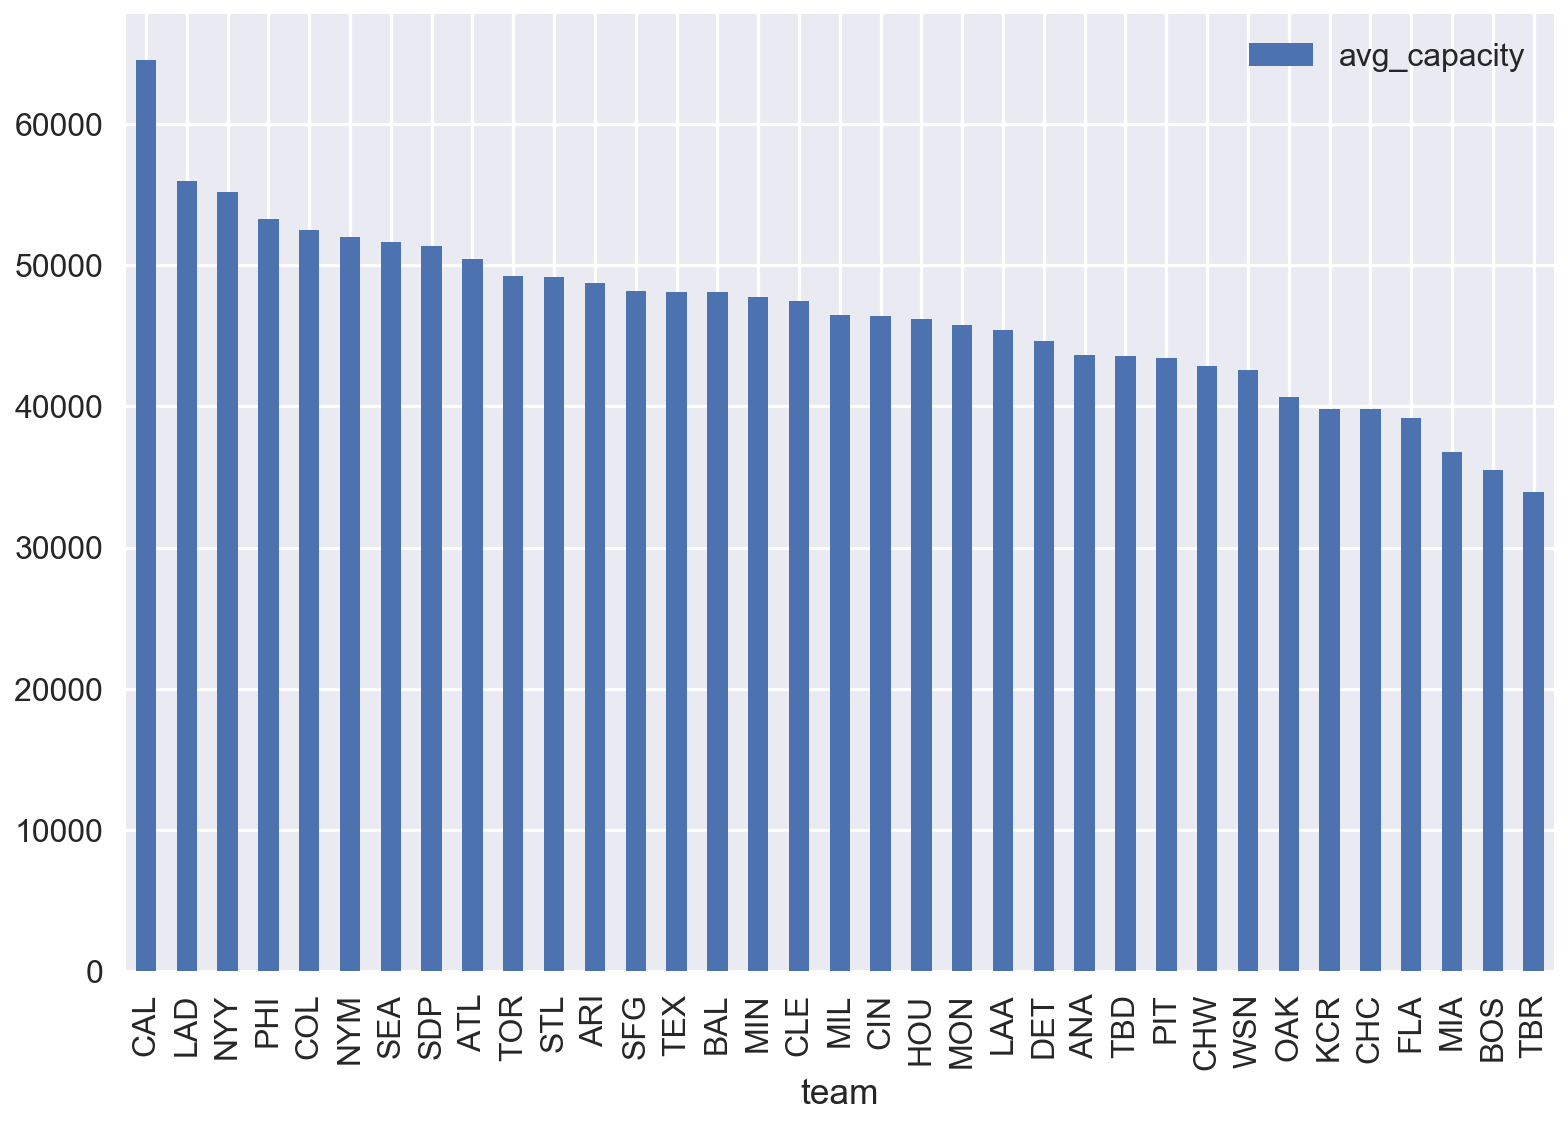

In [23]:
team_summary.sort_values('avg_capacity', ascending=False).plot(x='team', y='avg_capacity', kind='bar')

### Park Summary

In [24]:
stadium_summary = pd.DataFrame(columns=['stadium', 'avg_win_pct', 'avg_capacity',
                                     'std_capacity', 'avg_attendance', 'std_attendance'])
for i in yearly.stadium.unique():    
    avg_win_pct = round(np.mean(yearly[yearly.stadium == i].win_pct), 3)
    avg_cap = round(np.mean(yearly[yearly.stadium == i].capacity),0)
    std_cap = np.std(yearly[yearly.stadium == i].capacity)
    avg_att = round(np.mean(yearly[yearly.stadium == i].attendance),0) / 1000000
    std_att = np.std(yearly[yearly.stadium == i].attendance) / 1000000
    
    stadium_summary.loc[len(stadium_summary)] = [i, avg_win_pct, avg_cap, std_cap, avg_att, std_att]

In [25]:
stadium_summary.sort_values('avg_capacity')

,stadium,avg_win_pct,avg_capacity,std_capacity,avg_attendance,std_attendance
6,Fenway Park,0.538,35460.0,1600.956431,2.676934,0.326426
23,Marlins Park,0.443,36742.0,0.000000,1.800540,0.217315
37,PNC Park,0.455,38309.0,204.926206,1.948405,0.326783
46,Tropicana,0.462,38997.0,5225.982285,1.488712,0.333968
18,Sun Life Stadium,0.476,39182.0,3623.924806,1.603401,0.477683
27,Target Field,0.442,39207.0,262.218479,2.582904,0.451466
7,Wrigley Field,0.486,39816.0,1098.275818,2.729558,0.414903
21,Kauffman Stadium,0.456,39818.0,1242.928512,1.720504,0.351912
33,O.co Coliseum,0.518,40656.0,5170.525357,1.804549,0.462271
17,Comerica Park,0.485,41078.0,488.903703,2.466937,0.533170


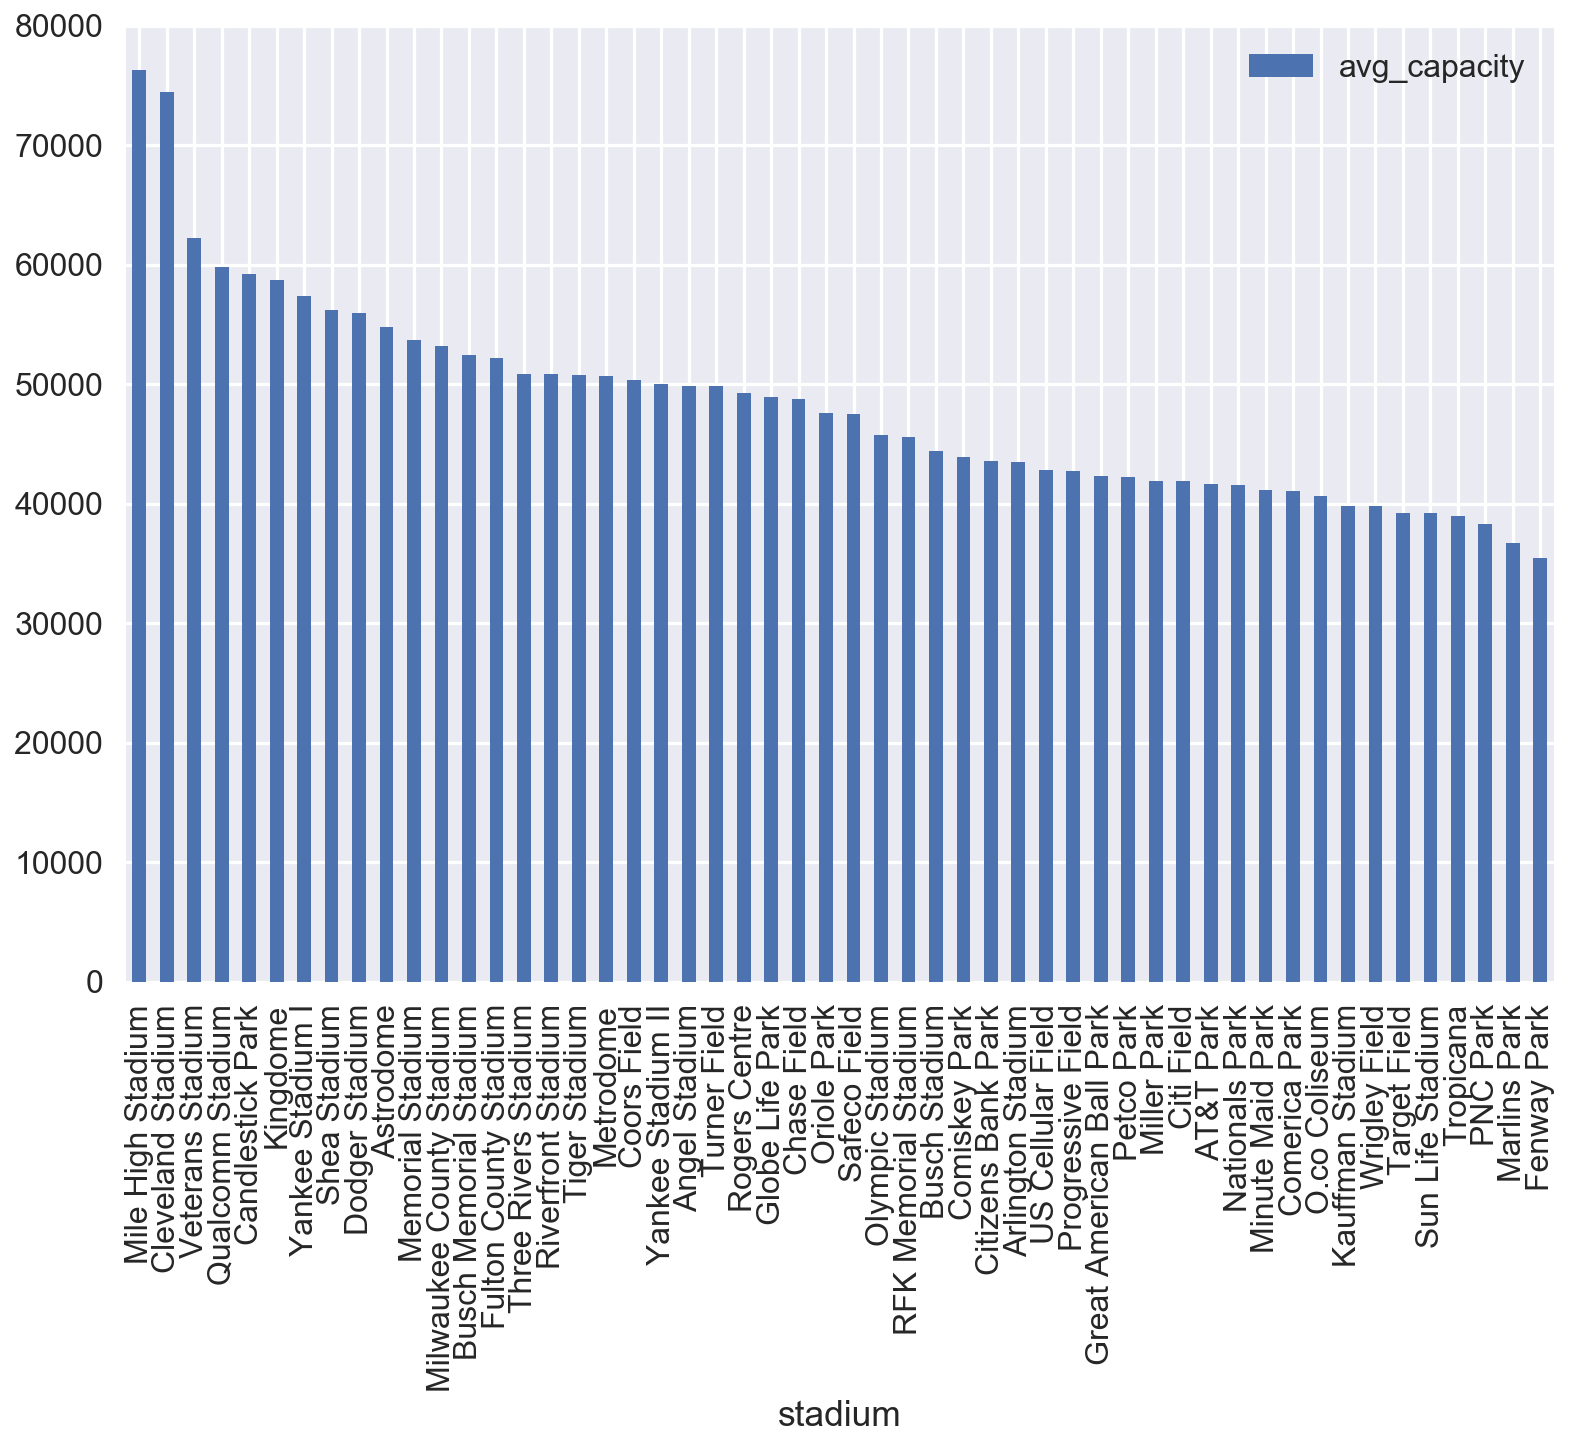

In [26]:
stadium_summary.sort_values('avg_capacity', ascending=False).plot(x='stadium', y='avg_capacity', kind='bar')

### Active Parks

In [27]:
active_parks = yearly
for i in yearly.stadium.unique():
    if i not in yearly[yearly.year == 2016].stadium.unique():
        active_parks = active_parks[active_parks.stadium != i]

In [28]:
active_parks_summary = pd.DataFrame(columns=['team', 'stadium', 'first_year', 'avg_win_pct', 'avg_capacity',
                                             'std_capacity', 'avg_attendance', 'std_attendance'])
for i in active_parks.stadium.unique():
    active_parks_summary.loc[len(active_parks_summary)] = [
        active_parks[(active_parks.stadium == i)].reset_index().loc[0, 'team'],
        i,
        min(active_parks[active_parks.stadium == i].year),
        round(np.mean(active_parks[active_parks.stadium == i].win_pct), 3),
        round(np.mean(active_parks[active_parks.stadium == i].capacity),0),
        np.std(active_parks[active_parks.stadium == i].capacity),
        round(np.mean(active_parks[active_parks.stadium == i].attendance),0) / 1000000,
        np.std(active_parks[active_parks.stadium == i].attendance) / 1000000
    ]

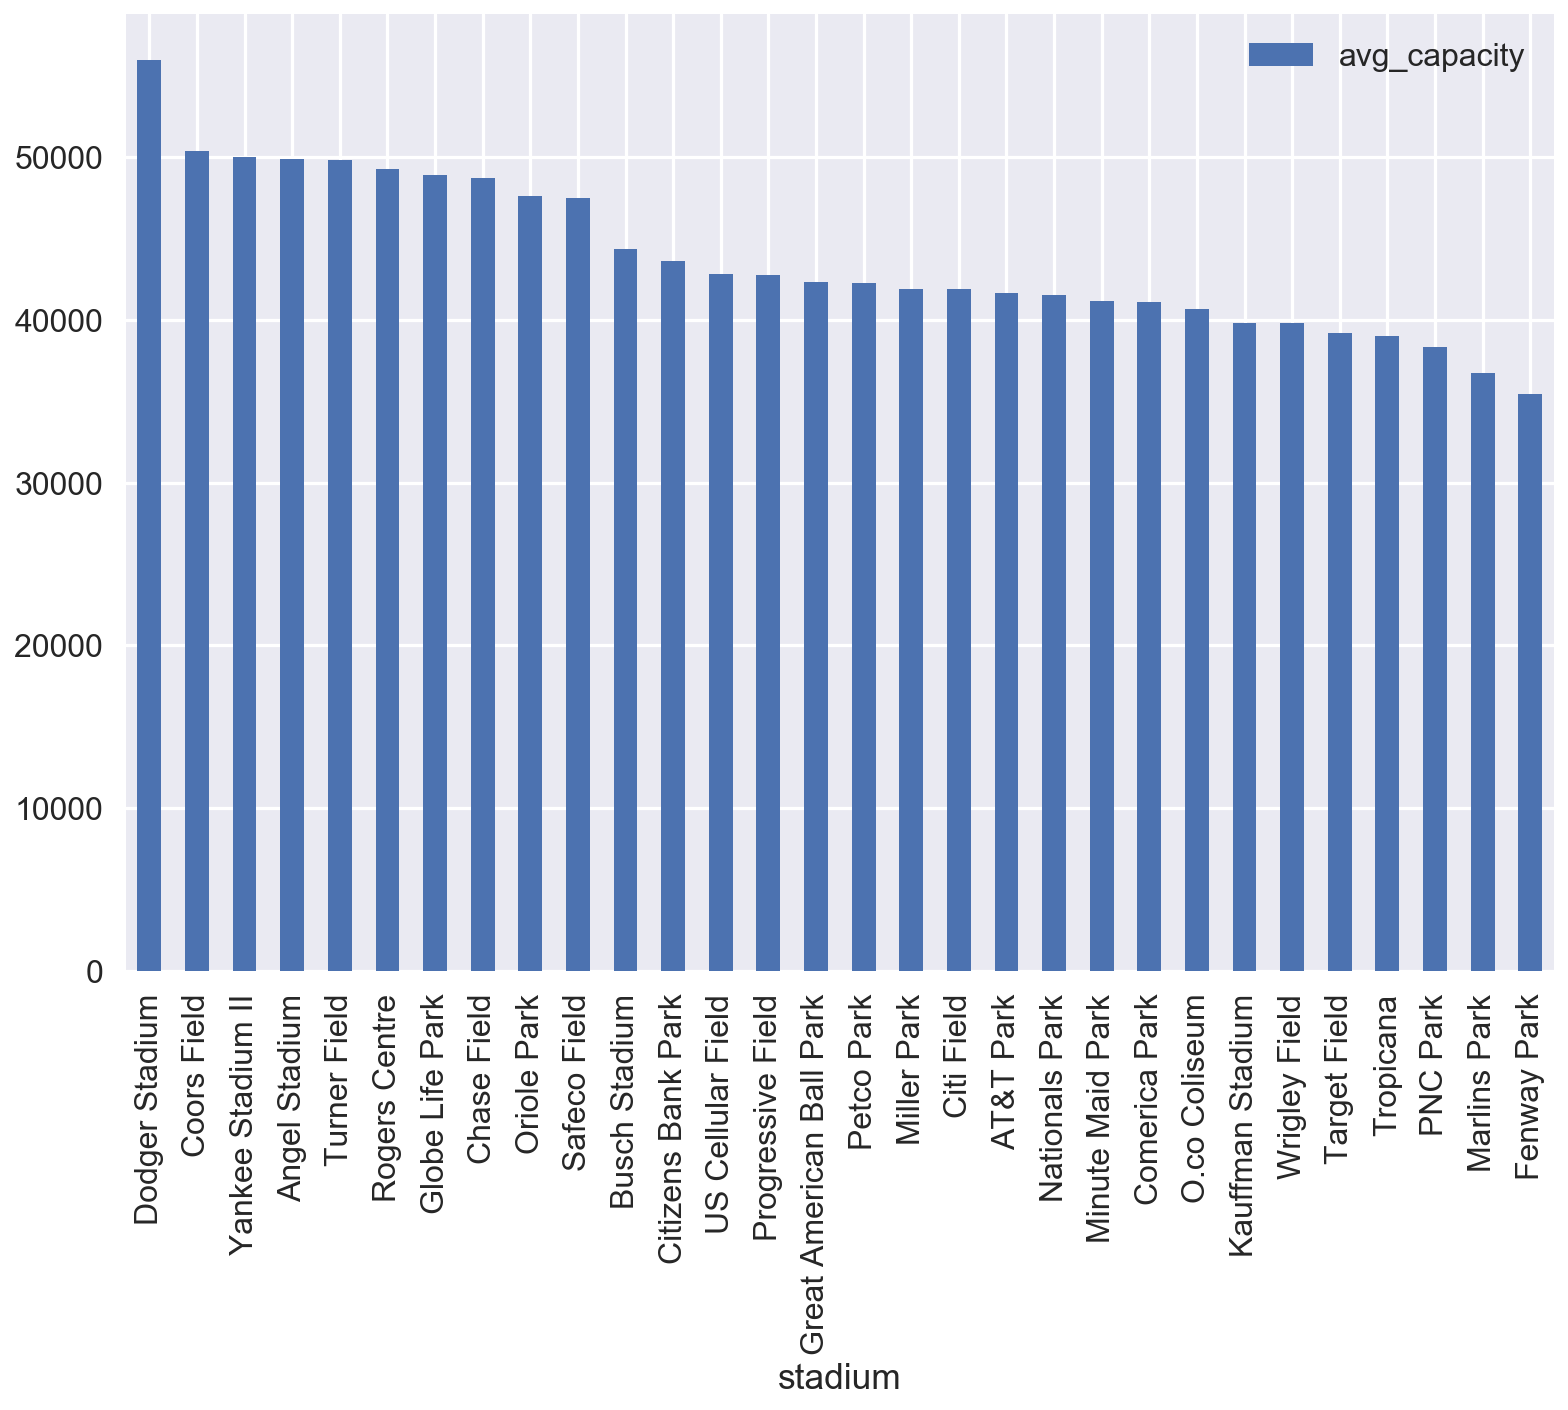

In [29]:
active_parks_summary.sort_values('avg_capacity', ascending=False).plot(x='stadium', y='avg_capacity', kind='bar')

In [30]:
active_parks_summary['avg_over_std'] = active_parks_summary.avg_attendance / active_parks_summary.std_attendance

active_parks_summary = active_parks_summary.sort_values('avg_attendance').reset_index(drop=True)
active_parks_summary.sort_values('std_capacity')

,team,stadium,first_year,avg_win_pct,avg_capacity,std_capacity,avg_attendance,std_attendance,avg_over_std
27,LAD,Dodger Stadium,1990,0.528,56000.0,0.000000,3.293150,0.412026,7.992571
2,MIA,Marlins Park,2012,0.443,36742.0,0.000000,1.800540,0.217315,8.285411
16,MIL,Miller Park,2001,0.471,41900.0,0.000000,2.558100,0.407170,6.282630
6,CIN,Great American Ball Park,2003,0.479,42302.0,22.999556,2.177791,0.221102,9.849693
13,NYM,Citi Field,2009,0.486,41876.0,59.062996,2.495941,0.332250,7.512245
24,COL,Coors Field,1995,0.469,50386.0,91.646554,2.864747,0.546412,5.242829
25,PHI,Citizens Bank Park,2004,0.519,43600.0,99.886741,2.996542,0.624961,4.794763
8,WSN,Nationals Park,2008,0.498,41547.0,194.605838,2.290062,0.320979,7.134615
4,PIT,PNC Park,2001,0.455,38309.0,204.926206,1.948405,0.326783,5.962388
10,ARI,Chase Field,1998,0.488,48725.0,217.795490,2.453290,0.458081,5.355582


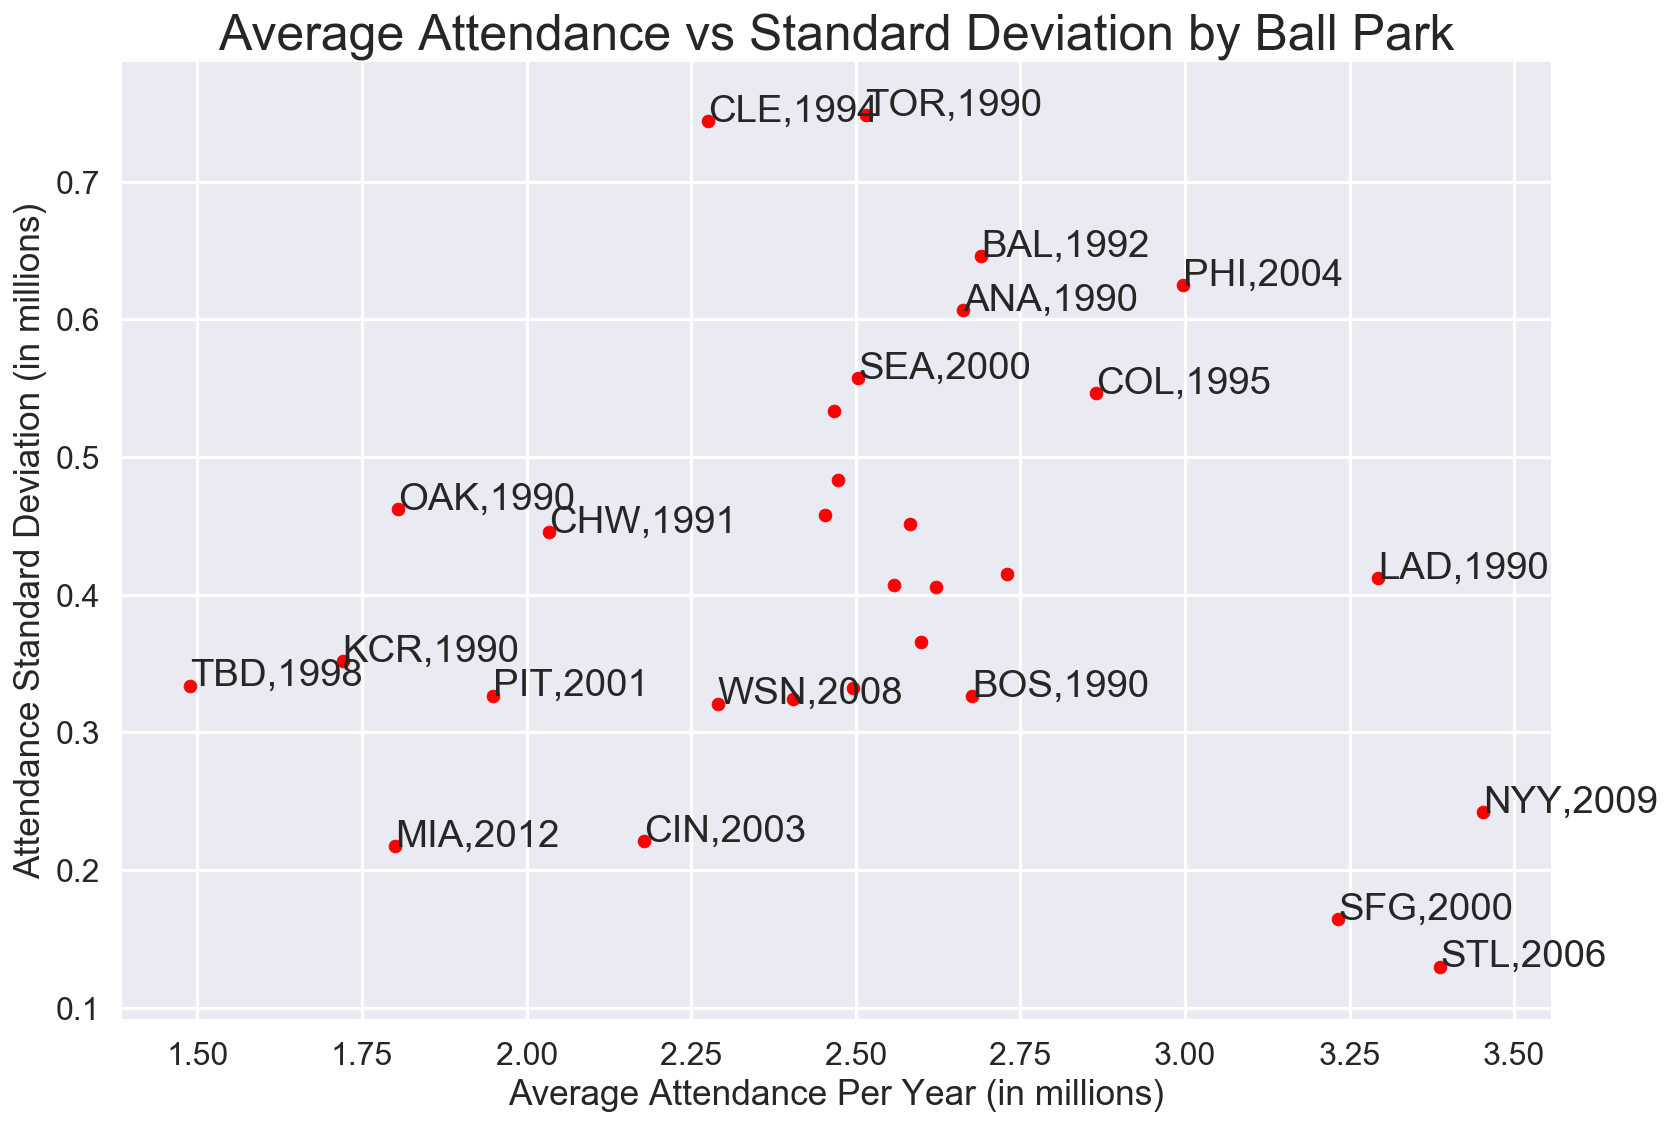

In [31]:
active_parks_summary.plot(y='std_attendance', x='avg_attendance', kind='scatter', c = 'r', s=40)

for i in [0,1,2,3,4,5,6,7,8,14,15,20,21,22,24,25,26,27,28,29]:
    plt.annotate(
        s=(active_parks_summary.loc[i, 'team'] + ',' + str(active_parks_summary.loc[i, 'first_year'])),
        xy=(active_parks_summary.loc[i, 'avg_attendance'], active_parks_summary.loc[i, 'std_attendance'])
    )
plt.title('Average Attendance vs Standard Deviation by Ball Park', fontsize=25)
plt.xlabel('Average Attendance Per Year (in millions)')
plt.ylabel('Attendance Standard Deviation (in millions)')

### Active Parks 2000-present

In [32]:
active2000 = active_parks[active_parks.year >= 2000]

active2000_summary = pd.DataFrame(columns=['team', 'stadium', 'first_year', 'avg_win_pct', 'avg_capacity',
                                             'std_capacity', 'avg_attendance', 'std_attendance'])
for i in active2000.stadium.unique():
    active2000_summary.loc[len(active2000_summary)] = [
        active2000[(active2000.stadium == i)].reset_index().loc[0, 'team'],
        i,
        min(active_parks[active_parks.stadium == i].year),
        round(np.mean(active2000[active2000.stadium == i].win_pct), 3),
        round(np.mean(active2000[active2000.stadium == i].capacity),0),
        np.std(active2000[active2000.stadium == i].capacity),
        round(np.mean(active2000[active2000.stadium == i].attendance),0) / 1000000,
        np.std(active2000[active2000.stadium == i].attendance) / 1000000
    ]

In [47]:
active2000_summary = active2000_summary.sort_values('avg_attendance').reset_index(drop=True)
active2000_summary.sort_values('avg_capacity')

,team,stadium,first_year,avg_win_pct,avg_capacity,std_capacity,avg_attendance,std_attendance
22,BOS,Fenway Park,1990,0.547,36315.0,1443.121899,2.885455,0.153619
2,MIA,Marlins Park,2012,0.443,36742.0,0.000000,1.800540,0.217315
3,OAK,O.co Coliseum,1990,0.531,37984.0,4204.671093,1.828434,0.277067
4,PIT,PNC Park,2001,0.455,38309.0,204.926206,1.948405,0.326783
0,TBD,Tropicana,1998,0.468,38326.0,5118.295930,1.424494,0.243515
20,MIN,Target Field,2010,0.442,39207.0,262.218479,2.582904,0.451466
1,KCR,Kauffman Stadium,1990,0.448,39344.0,1358.643288,1.744486,0.362862
23,CHC,Wrigley Field,1990,0.492,40433.0,941.055882,2.985272,0.209851
13,DET,Comerica Park,2000,0.485,41078.0,488.903703,2.466937,0.533170
14,HOU,Minute Maid Park,2000,0.476,41170.0,388.102553,2.472855,0.483383


In [34]:
active2000_summary.loc[25, 'team'] = 'LAA'

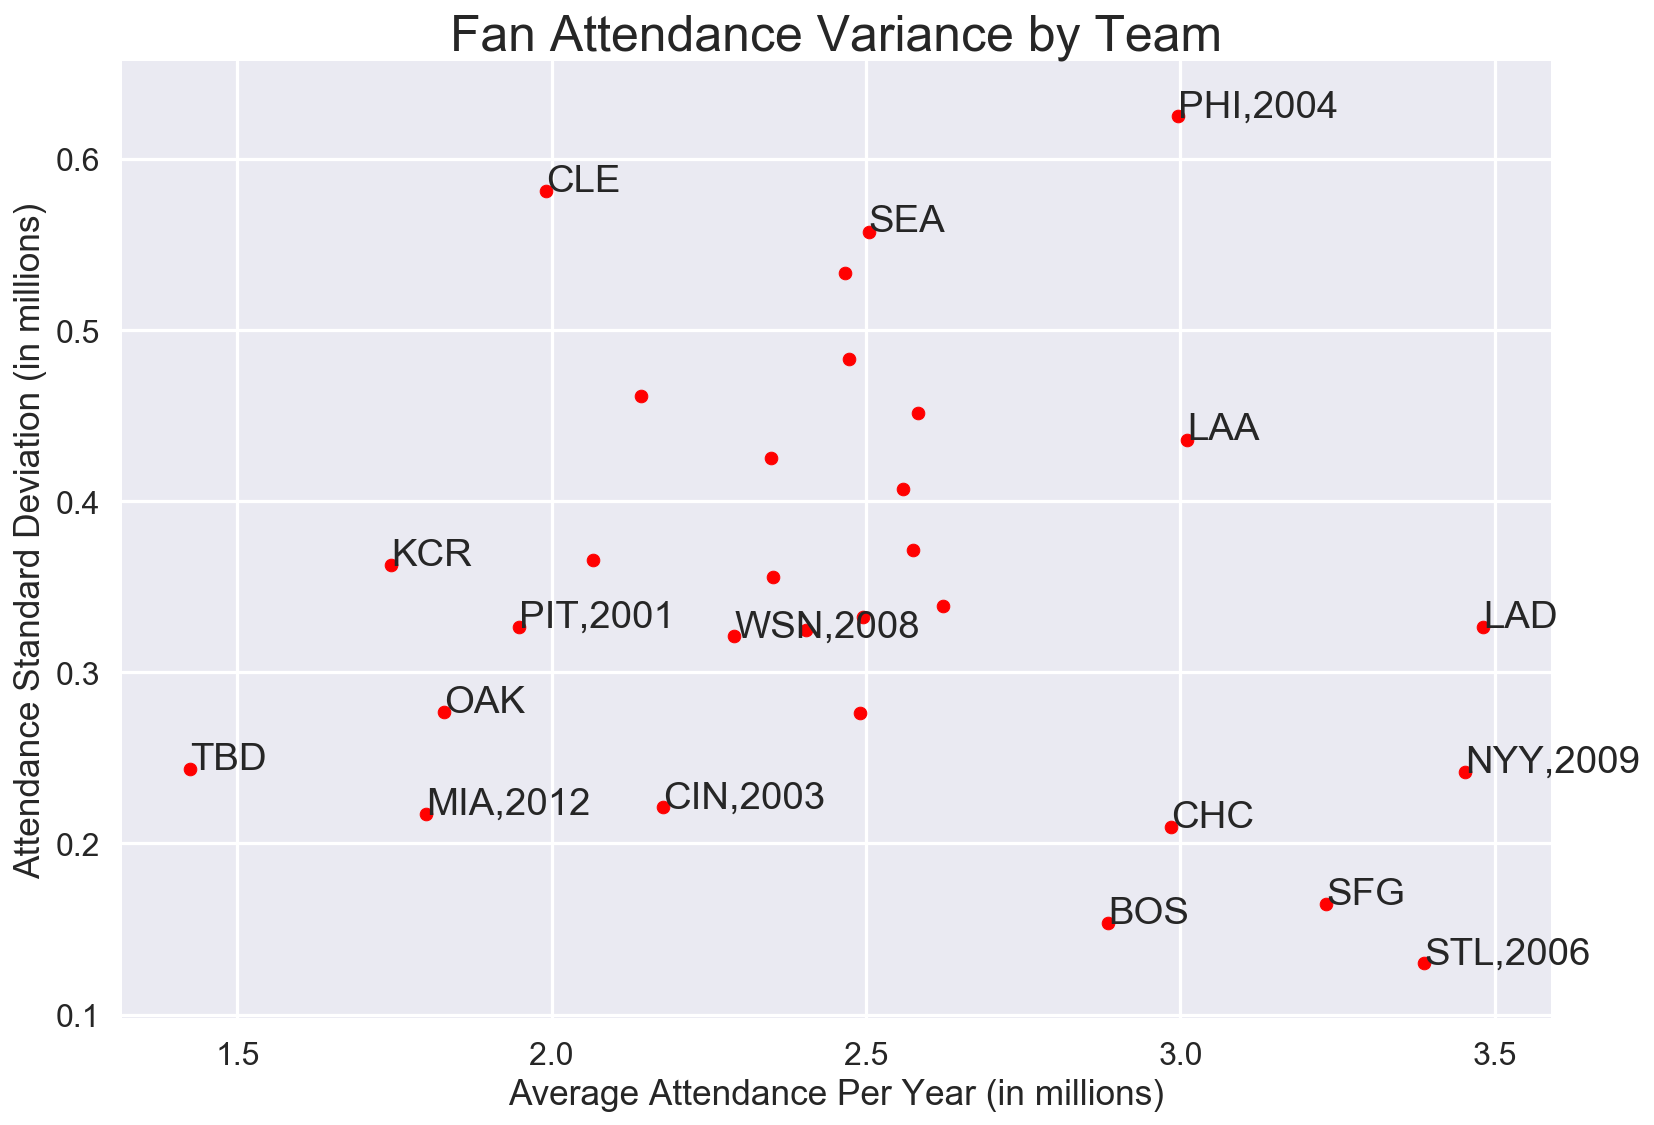

In [49]:
active2000_summary.plot(y='std_attendance', x='avg_attendance', kind='scatter', c = 'r', s=40)

for i in [0,1,2,3,4,5,8,9,17,22,23,24,25,26,27,28,29]:
    if active2000_summary.loc[i, 'first_year'] > 2000:
        plt.annotate(
            s=(active2000_summary.loc[i, 'team'] + ',' + str(active2000_summary.loc[i, 'first_year'])),
            xy=(active2000_summary.loc[i, 'avg_attendance'], active2000_summary.loc[i, 'std_attendance'])
        )
    else:
        plt.annotate(
            s=(active2000_summary.loc[i, 'team']),
            xy=(active2000_summary.loc[i, 'avg_attendance'], active2000_summary.loc[i, 'std_attendance'])
        )
plt.title('Fan Attendance Variance by Team', fontsize=25)
plt.xlabel('Average Attendance Per Year (in millions)')
plt.ylabel('Attendance Standard Deviation (in millions)')
plt.savefig('../images/attendance-scatter.png')

---

### Correlation between win_pct and attendance

In [40]:
from scipy.stats import pearsonr

In [41]:
win_pct_corr = pd.DataFrame(columns=['team', 'correlation'])
for i in yearly.team.unique():
    win_pct_corr.loc[len(win_pct_corr)] = [i, pearsonr(yearly[yearly.team == i].win_pct,
                                                       yearly[yearly.team == i].attendance)[0]]

In [42]:
win_pct_corr = win_pct_corr.sort_values('correlation', ascending=False).reset_index(drop=True)

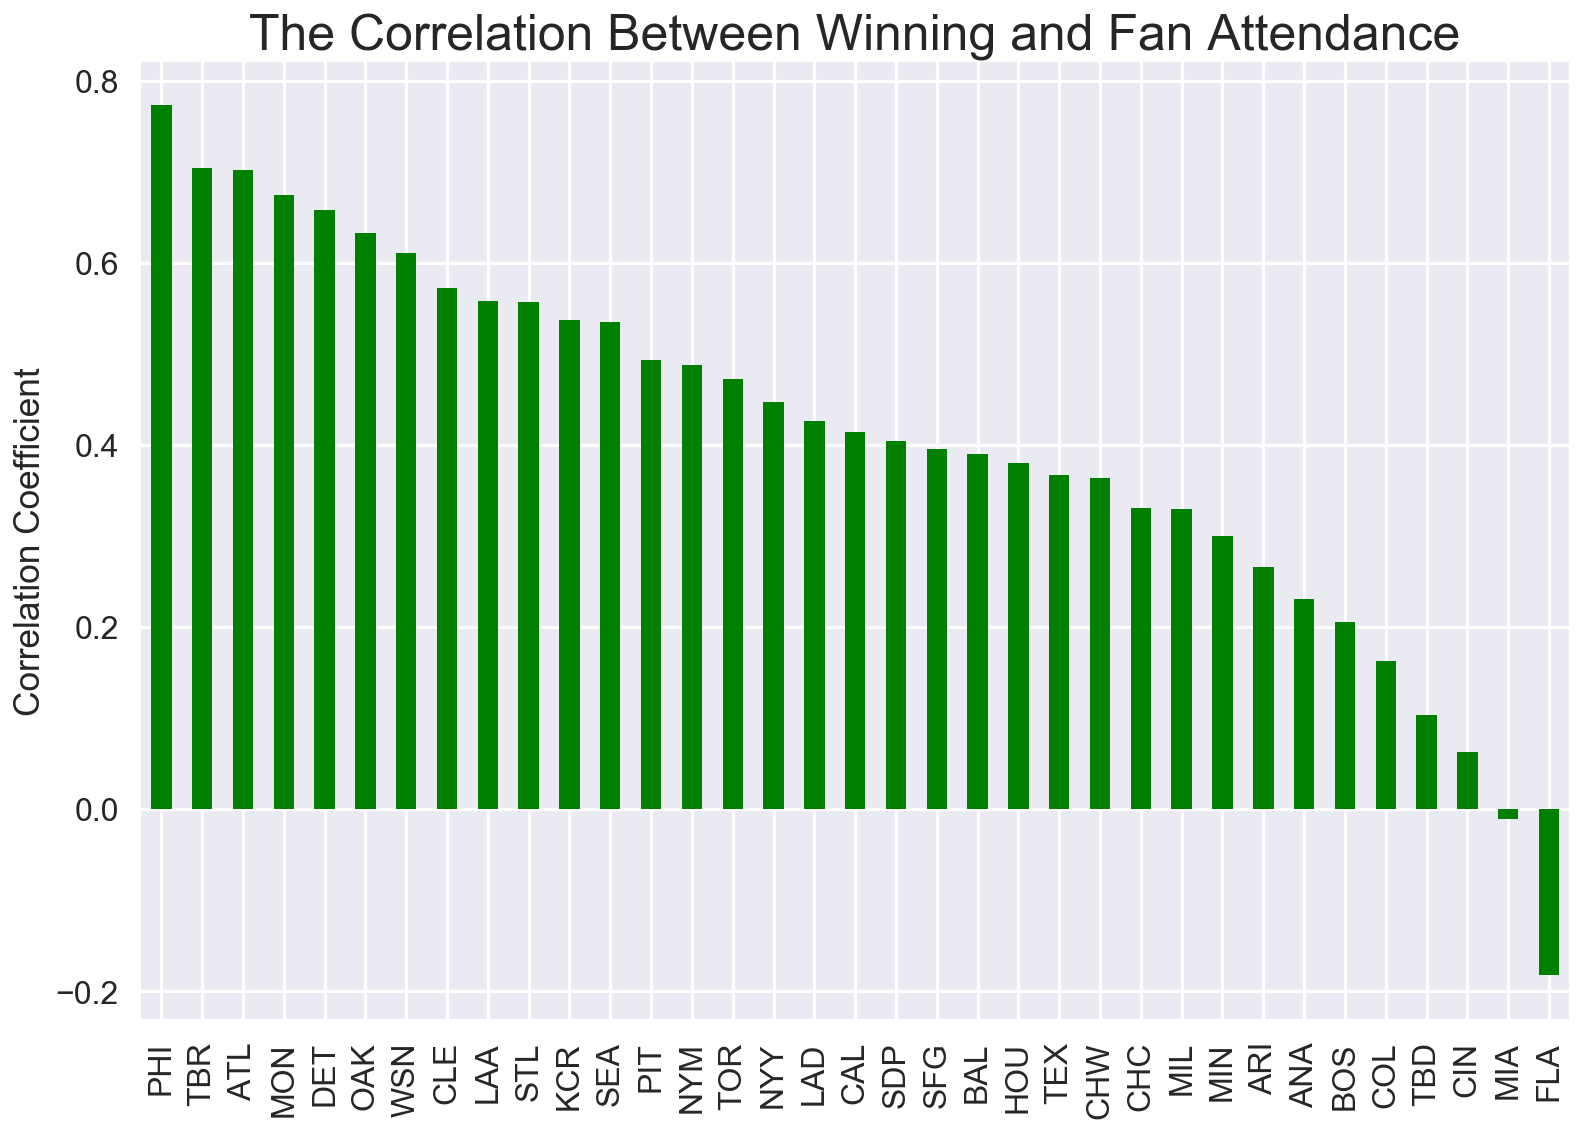

In [51]:
win_pct_corr.plot(x='team', kind='bar', color='g')
plt.title('The Correlation Between Winning and Fan Attendance', fontsize=25)
plt.xlabel('')
plt.ylabel('Correlation Coefficient')
plt.legend().set_visible(False)
plt.savefig('../images/win-pct-att-corr.png')